<h1 align="center"> Machine Learning </h1>
<h2 align="center"> Coding Assignemt 1</h3>
<h5 align="center"> Mohammad Hossein Shafieizadegan </h5>
<h5 align="center"> 99104781</h5>

# Question 1

In [25]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix
from collections import Counter
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB


In [26]:
# Load dataset
data = load_breast_cancer()
X = data.data  
y = data.target

print(f"Size of dataset: {X.shape}")

# Create a DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target  # Adding the target column

# Display the first few rows of the dataset
print(df.head())


Size of dataset: (569, 30)
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  w

In [27]:

# split the dataset to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("X_train:", X_train.shape)
print("y_train:", y_train.shape)

print("X_test:", X_test.shape)
print("y_test:", y_test.shape)


X_train: (398, 30)
y_train: (398,)
X_test: (171, 30)
y_test: (171,)


In [39]:
import numpy as np

def train_perceptron(X, y, learning_rate=0.01, epochs=100):
    # Initialize weights and bias
    weights = np.zeros(X.shape[1])
    bias = 0

    for epoch in range(epochs):
        # Compute predicted values
        y_pred = predict_perceptron(X, weights, bias)

        # Update weights and bias using batch mode
        weights += learning_rate * np.dot((y - y_pred), X)
        bias -= learning_rate * np.sum(y - y_pred)

    return weights, bias

def predict_perceptron(X, weights, bias):
    return np.where(np.dot(X, weights) - bias >= 0, 1, 0)

# Example usage
# Initialize and train the perceptron
trained_weights, trained_bias = train_perceptron(X_train, y_train, learning_rate=0.01, epochs=1000)

# Predictions on the test set
y_pred = predict_perceptron(X_test, trained_weights, trained_bias)

# Calculate accuracy and confusion matrix
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Display results
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)


Accuracy: 0.9532163742690059
Confusion Matrix:
 [[ 59   4]
 [  4 104]]


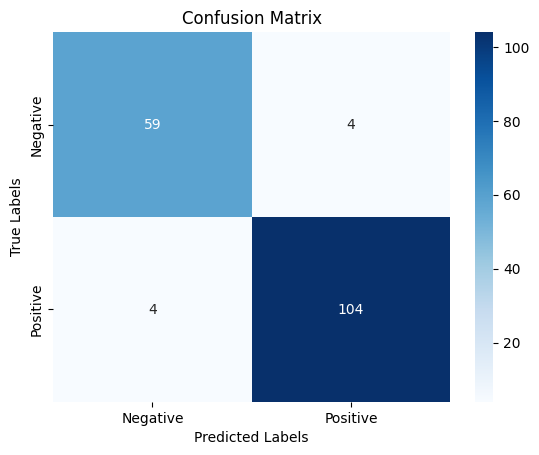

In [29]:
def disp_conf_mat(conf_matrix):
    # Visualize the confusion matrix using a heatmap
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'],
                yticklabels=['Negative', 'Positive'])
    plt.figure
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

disp_conf_mat(conf_matrix)


Results for k = 1
Accuracy: 0.935672514619883


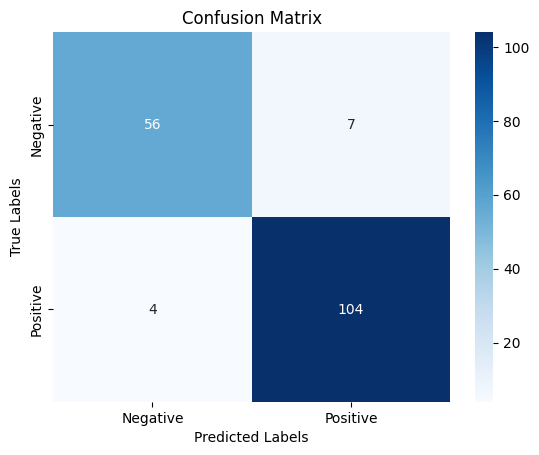


Results for k = 3
Accuracy: 0.9415204678362573


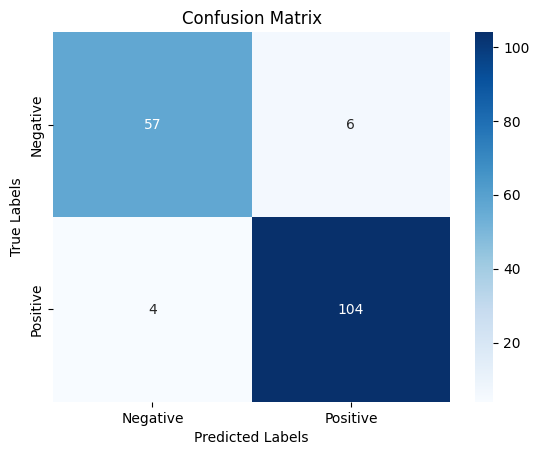


Results for k = 5
Accuracy: 0.9590643274853801


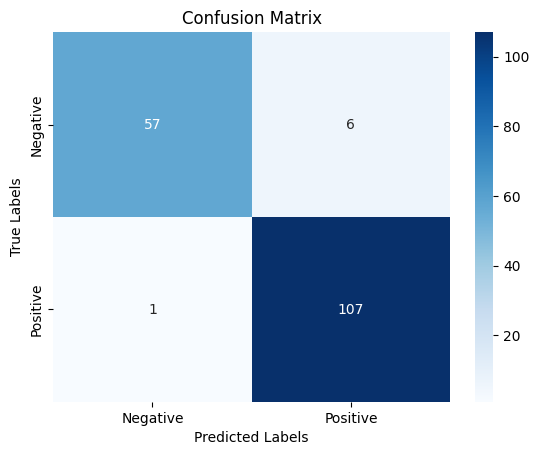


Results for k = 7
Accuracy: 0.9649122807017544


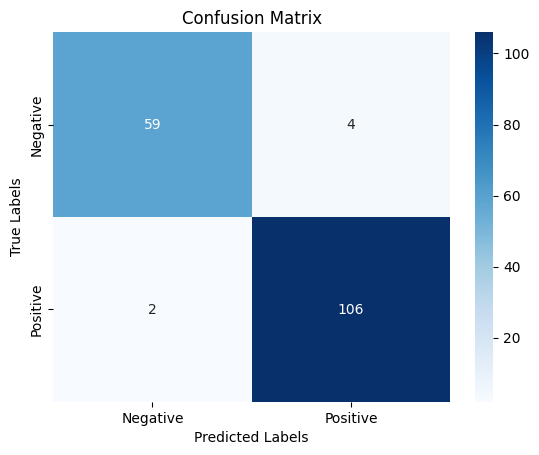

In [40]:
def knn_predict(X_train, y_train, X_test, k=3):
    predictions = [predict_single(x, X_train, y_train, k) for x in X_test]
    return np.array(predictions)

def predict_single(x, X_train, y_train, k):
    # Calculate distances to all points in the training set
    distances = [np.linalg.norm(x - x_train) for x_train in X_train]

    # Get indices of k-nearest training data points
    k_neighbors_indices = np.argsort(distances)[:k]

    # Get the labels of the k-nearest training data points
    k_neighbor_labels = [y_train[i] for i in k_neighbors_indices]

    # Return the most common class label
    most_common = Counter(k_neighbor_labels).most_common(1)
    return most_common[0][0]


# Define k values
k_values = [1, 3, 5, 7]

for k in k_values:
    y_pred = knn_predict(X_train, y_train, X_test, k)
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Display results
    print(f"\nResults for k = {k}")
    print("Accuracy:", accuracy)
    disp_conf_mat(conf_matrix)



Results for SVM
Accuracy: 0.9649122807017544


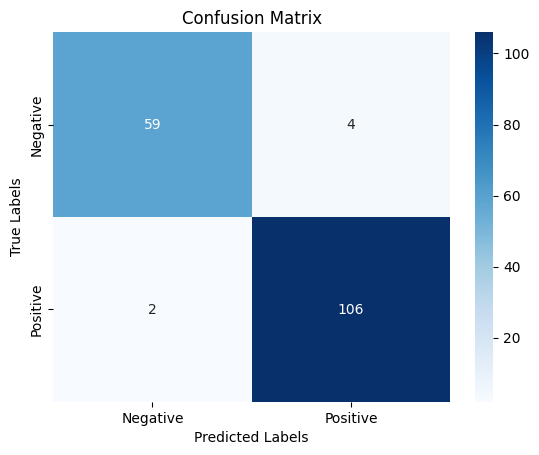

In [41]:
# Initialize and train the SVM classifier
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svm = svm_classifier.predict(X_test)

# Calculate accuracy and confusion matrix for SVM
accuracy_svm = accuracy_score(y_test, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

# Display results for SVM
print("\nResults for SVM")
print("Accuracy:", accuracy_svm)

disp_conf_mat(conf_matrix)


Results for Gaussian Naive Bayes
Accuracy: 0.9415204678362573


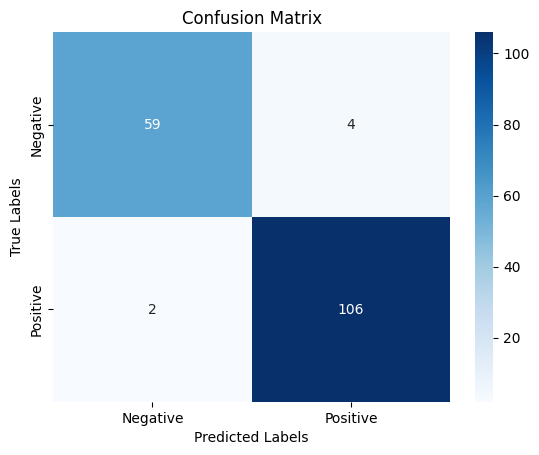

In [42]:
# Initialize and train the Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_nb = nb_classifier.predict(X_test)

# Calculate accuracy and confusion matrix for Naive Bayes
accuracy_nb = accuracy_score(y_test, y_pred_nb)
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)

# Display results for Naive Bayes
print("\nResults for Gaussian Naive Bayes")
print("Accuracy:", accuracy_nb)
disp_conf_mat(conf_matrix)

In [56]:
from sklearn.metrics import precision_score, recall_score, f1_score

y_predics = [ y_pred_nb, 
              y_pred_svm,
              knn_predict(X_train, y_train, X_test, 7),
              knn_predict(X_train, y_train, X_test, 5),
              knn_predict(X_train, y_train, X_test, 3),
              knn_predict(X_train, y_train, X_test, 1),
              predict_perceptron(X_test, trained_weights, trained_bias)]

titles = ["Bayes Classifier", "SVM", "KNN, k=7", "KNN, k=5",
          "KNN, k=3", "KNN, k=1", "Perceptron"]

precisions = np.zeros(len(titles))
recalls = np.zeros(len(titles))
f1_scores = np.zeros(len(titles))

for i, y_pred in enumerate(y_predics):
    
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    precisions[i] = precision
    recalls[i] = recall
    f1_scores[i] = f1

    print(f"Metrics for {titles[i]}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    print("==========================\n")


print(f"{titles[np.argmax(precisions)]} has the best precison ")
print(f"{titles[np.argmax(recalls)]} has the best recall ")
print(f"{titles[np.argmax(f1_scores)]} has the best F1 score ")

Metrics for Bayes Classifier
Precision: 0.941391481684838
Recall: 0.9415204678362573
F1 Score: 0.9413171134406007

Metrics for SVM
Precision: 0.9649541140481607
Recall: 0.9649122807017544
F1 Score: 0.9647902680643603

Metrics for KNN, k=7
Precision: 0.9649541140481607
Recall: 0.9649122807017544
F1 Score: 0.9647902680643603

Metrics for KNN, k=5
Precision: 0.9601127475386665
Recall: 0.9590643274853801
F1 Score: 0.958681622346131

Metrics for KNN, k=3
Precision: 0.941391481684838
Recall: 0.9415204678362573
F1 Score: 0.9413171134406007

Metrics for KNN, k=1
Precision: 0.9356092935040304
Recall: 0.935672514619883
F1 Score: 0.9353286323057894

Metrics for Perceptron
Precision: 0.9532163742690059
Recall: 0.9532163742690059
F1 Score: 0.9532163742690059

SVM has the best precison 
SVM has the best recall 
SVM has the best F1 score 


# Question 2

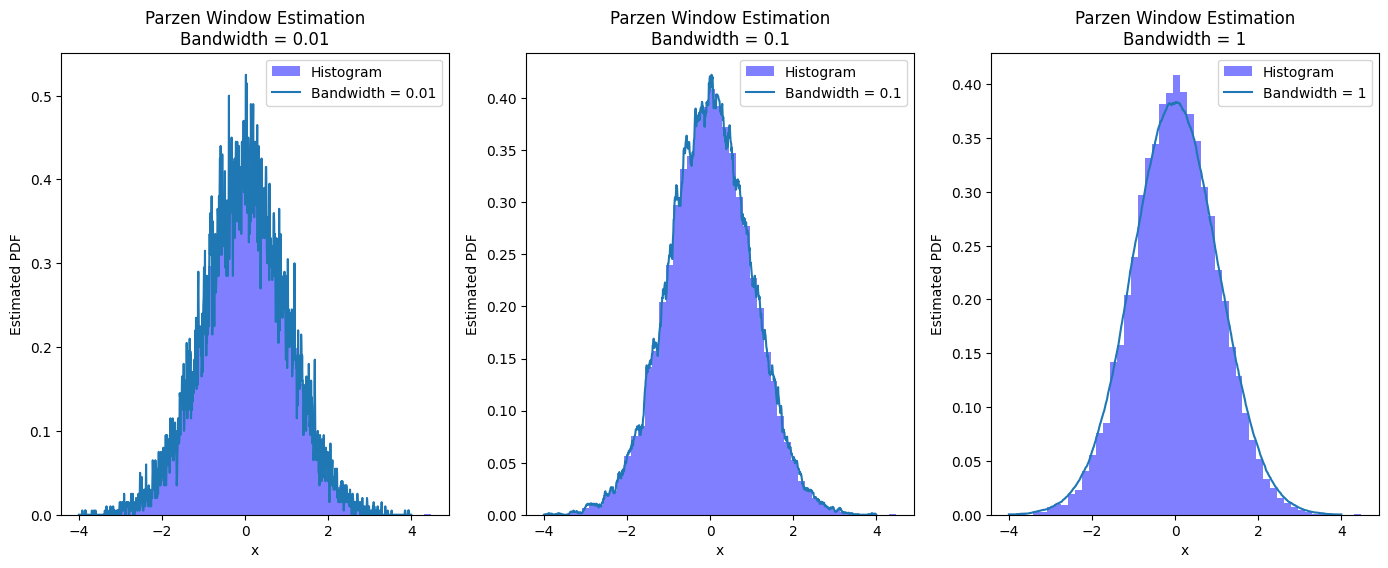

In [48]:
np.random.seed(42)  # for reproducibility
X = np.random.normal(0, 1, 20000)

def parzen_window(x, samples, h=1):
    
    total = 0
    for sample in samples:
        total += 1/h * uniform_kernel((x - sample) / h)
    return total / len(samples)

def uniform_kernel(u):
    
    return np.where(np.abs(u) <= 0.5, 1, 0)

    
def parzen_window_pdf(x_values, samples, h=1):
    pdf_values = [parzen_window(x, samples, h) for x in x_values]
    return np.array(pdf_values)

# Define bandwidth values
bandwidth_values = [0.01, 0.1, 1]

# Plot the estimated PDF for each bandwidth
plt.figure(figsize=(17, 6))
for i, bandwidth in enumerate(bandwidth_values, 1):
    plt.subplot(1, 3, i)
    plt.hist(X, bins=50, density=True, alpha=0.5, color='blue', label='Histogram')
    x_values = np.linspace(-4, 4, 1000)
    pdf_values = parzen_window(x_values, X, h=bandwidth)
    plt.plot(x_values, pdf_values, label=f'Bandwidth = {bandwidth}')
    plt.xlabel('x')
    plt.ylabel('Estimated PDF')
    plt.title(f'Parzen Window Estimation\nBandwidth = {bandwidth}')
    plt.legend()

plt.show()